## Курсовая работа Окпный М.О. ИУ5-64

In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score

In [2]:
data = pd.read_csv('C:\\Users\\Mark\\wineqty.csv')

In [3]:
data.head()

,fixed acidity (g/L),volatile acidity (g/L),citric acid (g/L),residual sugar (g/L),chlorides (g/L),free sulfur dioxide (mg/L),total sulfur dioxide (mg/L),density (g/ml),pH level,sulphates (g/L),alcohol percentage,quality rating (0-10)
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


попробуем в зависимости от  параметров вина предсказывать качество

In [4]:
data.isnull().sum()

fixed acidity (g/L)            0
volatile acidity (g/L)         0
citric acid (g/L)              0
residual sugar (g/L)           0
chlorides (g/L)                0
free sulfur dioxide (mg/L)     0
total sulfur dioxide (mg/L)    0
density (g/ml)                 0
pH level                       0
sulphates (g/L)                0
alcohol percentage             0
quality rating (0-10)          0
dtype: int64

In [5]:
data.dtypes

fixed acidity (g/L)            float64
volatile acidity (g/L)         float64
citric acid (g/L)              float64
residual sugar (g/L)           float64
chlorides (g/L)                float64
free sulfur dioxide (mg/L)     float64
total sulfur dioxide (mg/L)    float64
density (g/ml)                 float64
pH level                       float64
sulphates (g/L)                float64
alcohol percentage             float64
quality rating (0-10)            int64
dtype: object

In [6]:
data.head()

,fixed acidity (g/L),volatile acidity (g/L),citric acid (g/L),residual sugar (g/L),chlorides (g/L),free sulfur dioxide (mg/L),total sulfur dioxide (mg/L),density (g/ml),pH level,sulphates (g/L),alcohol percentage,quality rating (0-10)
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


C:\Users\Mark\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


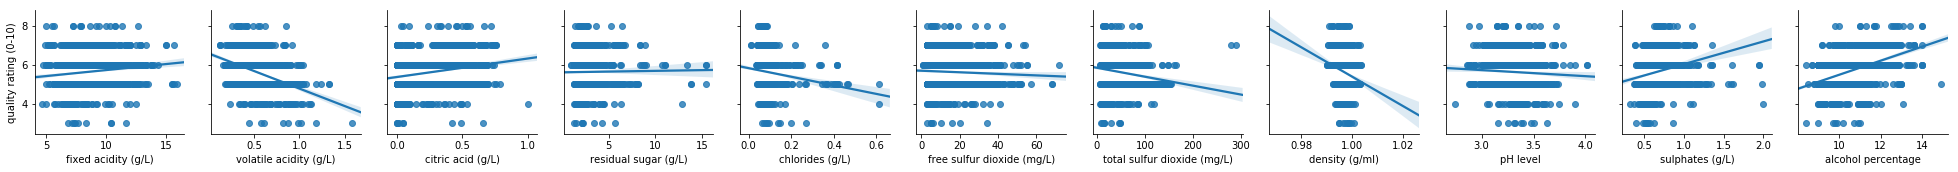

In [7]:
params  = list([i for i in data.columns if i != 'quality rating (0-10)'])
g = sns.pairplot(data, x_vars= params, y_vars=['quality rating (0-10)'], kind="reg")

In [8]:
data.head(5)

,fixed acidity (g/L),volatile acidity (g/L),citric acid (g/L),residual sugar (g/L),chlorides (g/L),free sulfur dioxide (mg/L),total sulfur dioxide (mg/L),density (g/ml),pH level,sulphates (g/L),alcohol percentage,quality rating (0-10)
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


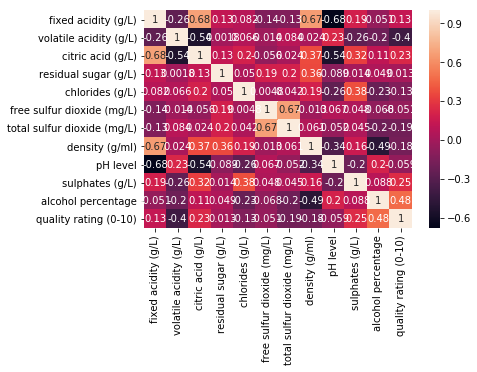

In [9]:
sns.heatmap(data.corr(), annot = True)

имеет смысл использовать для обучения alcohol percentage,sulphates (g/L),citric acid (g/L),volatile acidity (g/L)

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['quality rating (0-10)']])
lenc = LabelEncoder()
encoded = lenc.fit_transform(data['quality rating (0-10)'])
print(set(encoded))
data['quality rating (0-10)'] = encoded
data.head()


{0, 1, 2, 3, 4, 5}


C:\Users\Mark\Python\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,fixed acidity (g/L),volatile acidity (g/L),citric acid (g/L),residual sugar (g/L),chlorides (g/L),free sulfur dioxide (mg/L),total sulfur dioxide (mg/L),density (g/ml),pH level,sulphates (g/L),alcohol percentage,quality rating (0-10)
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


### Данные подготовлены теперь выберем метрики для оценки качества моделей которые будем строить
Так как мы рассматриваем задачу классификации, то будем использовать следующие метрики:
- Balanced_accuracy - процент верных предсказаний с учетом дисбаланса классов
- Precision (точность) — доля верно предсказанных классификатором положительных объектов, из всех объектов, которые классификатор верно или неверно определил как положительные.
- F metric - представляет собой гармоническое среднее между точностью(Accuracy) и полнотой(Recall). Она стремится к нулю, если точность или полнота стремится к нулю.

#### метод с помощью которого будем конвертировать целевой признак в бинарный

In [11]:
def target_to_binary(array: np.ndarray, target:int) -> np.ndarray:
    # Если целевой признак совпадает с указанным, то 1 иначе 0
    res = [1 if x==target else 0 for x in array]
    return res

### Выберем наиболее подходяще модели для решения задачи классификации.
 #### Выберем следующие модели обучения:
- Метод k ближайших соседей
- SVM
- Дерево решений
- Случайный лес
- Бустинг

### Формируем обучающую и тестовую выборки на основе исходного набора данных.

In [12]:
x_cols = ['alcohol percentage','sulphates (g/L)','citric acid (g/L)','volatile acidity (g/L)']
y_col = 'quality rating (0-10)'
x_train, x_test, y_train, y_test = train_test_split(
    data[x_cols], data[y_col],
    test_size=0.5, random_state=1)

In [13]:
x_train.shape, y_train.shape

((750, 4), (750,))

In [14]:
x_test.shape, y_test.shape

((750, 4), (750,))

#### Конвертация тестовых значений

In [15]:
bin_y_test = target_to_binary(y_test, 3)
print(bin_y_test)

[1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 

### Метод k ближайших соседей (k = 4)

In [16]:
cl1 = KNeighborsClassifier(n_neighbors=4)
cl1.fit(x_train, y_train)
quality1 = cl1.predict(x_test)

In [17]:
bin_quality1 = target_to_binary(quality1, 3)

#### Конвертация предсказанных признаков

In [18]:
bal = balanced_accuracy_score(bin_y_test, bin_quality1)
f1 = f1_score(bin_y_test, bin_quality1)
prc = precision_score(bin_y_test, bin_quality1)
print(bal, f1, prc)

0.596383147853736 0.4982332155477031 0.5423076923076923


### SVM 

In [19]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)
quality_svm = svm.predict(x_test)

#### Конвертация предсказанных признаков

In [20]:
bin_quality_svm = target_to_binary(quality_svm, 3)

In [21]:
bal = balanced_accuracy_score(bin_y_test, bin_quality_svm)
f1 = f1_score(bin_y_test, bin_quality_svm, average='macro')
prc = precision_score(bin_y_test, bin_quality_svm, average='macro')
print(bal, f1, prc)

0.5955661543896837 0.5946064395488808 0.5942125732861205


### Дерево решений

In [22]:
decision_tree = DecisionTreeClassifier(random_state=1, max_depth=0.75).fit(x_train, y_train)
quality_dtree = decision_tree.predict(x_test)

#### Конвертация предсказанных признаков

In [23]:
bin_quality_dtree = target_to_binary(quality_dtree, 3)

In [24]:
bal = balanced_accuracy_score(bin_y_test, bin_quality_dtree)
f1 = f1_score(bin_y_test, bin_quality_dtree, average='micro')
prc = precision_score(bin_y_test, bin_quality_dtree, average='micro')
print(bal, f1, prc)

0.5 0.592 0.592


### Случайный лес

In [25]:
forest = RandomForestClassifier(random_state=1, max_features = 2, n_estimators=100).fit(x_train, y_train)
target_forest = forest.predict(x_test) 

In [26]:
bin_target_forest = target_to_binary(target_forest, 3)

In [27]:
bal = balanced_accuracy_score(bin_y_test, bin_target_forest)
f1 = f1_score(bin_y_test, bin_target_forest)
prc = precision_score(bin_y_test,bin_target_forest)
print(bal, f1, prc)

0.6475446034269563 0.5776293823038398 0.590443686006826


### Бустинг

In [28]:
boosting = GradientBoostingClassifier(random_state=1).fit(x_train, y_train)
target_boosting = boosting.predict(x_test)

In [29]:
bin_target_boosting = target_to_binary(target_boosting, 3)

In [30]:
bal = balanced_accuracy_score(bin_y_test, bin_target_boosting)
f1 = f1_score(bin_y_test, bin_target_boosting)
prc = precision_score(bin_y_test,bin_target_boosting)
print(bal, f1, prc)

0.6216878643349232 0.5445378151260505 0.5605536332179931


### Подбор гиперпараметров для каждой из моделей

### k ближайших соседей

In [31]:
n_range = np.array(range(2,44,2))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
         36, 38, 40, 42])}]

In [32]:
k_neigb_search = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', iid=True, return_train_score=True)
k_neigb_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=[{'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [33]:
k_neigb_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [34]:
k_neigb_search.best_score_

0.584

In [35]:
k_neigb_search.best_params_

{'n_neighbors': 10}

#### Изменение качества на обучающей выборке

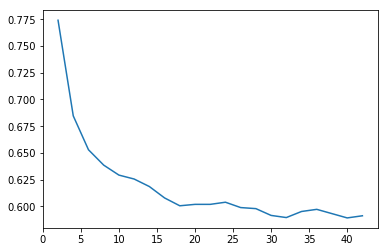

In [36]:
plt.plot(n_range, k_neigb_search.cv_results_['mean_train_score'])

#### Изменение качества на тестовой выборке

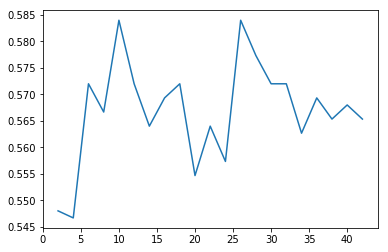

In [37]:
plt.plot(n_range, k_neigb_search.cv_results_['mean_test_score'])

### SVM

In [38]:
parameters = {'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
svm_search = GridSearchCV(SVC(), parameters, cv=2, scoring='accuracy')
svm_search.fit(x_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
svm_search.best_params_

{'gamma': 0.9}

In [40]:
svm_search.best_score_

0.564

### Дерево решений

In [41]:
n_range = np.array(range(1,10,1))
param = [{'max_depth': n_range}]
decision_tree_search = GridSearchCV(DecisionTreeClassifier(), param, cv=2, scoring='accuracy',iid = True)
decision_tree_search.fit(x_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
decision_tree_search.best_params_

{'max_depth': 4}

In [43]:
decision_tree_search.best_score_

0.5693333333333334

### Случайный лес

In [44]:
n_range2 = np.array(range(1,5,1))
tuned_parameters2 = [{'max_features': n_range2}]

In [45]:
forest_search = GridSearchCV(RandomForestClassifier(n_estimators=100), tuned_parameters2, cv=KFold(n_splits=10), scoring='accuracy')
forest_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_features': array([1, 2, 3, 4])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
forest_search.best_params_

{'max_features': 1}

In [47]:
forest_search.best_score_

0.6186666666666667

### Бустинг

In [48]:
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              }
estimator_gb = GradientBoostingClassifier(n_estimators = 600)

In [49]:
boost_search = GridSearchCV(estimator_gb,
                               gb_grid_params,
                               cv=2,
                               scoring='accuracy',
                               verbose = 3, 
                               n_jobs=10)
boost_search.fit(x_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   26.9s
[Parallel(n_jobs=10)]: Done  96 out of  96 | elapsed:  1.5min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=10,
       param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [50]:
boost_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=150, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [51]:
boost_search.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 150}

In [52]:
boost_search.best_score_

0.5746666666666667

### Построение решения для выбранных моделей c оптимальными значениями гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

### Метод k ближайших соседей

In [53]:
cl1 = KNeighborsClassifier(n_neighbors=10)
cl1.fit(x_train, y_train)
quality1 = cl1.predict(x_test)

In [54]:
bin_quality1 = target_to_binary(quality1, 3)

In [55]:
bal = balanced_accuracy_score(bin_y_test, bin_quality1)
f1 = f1_score(bin_y_test, bin_quality1)
prc = precision_score(bin_y_test, bin_quality1)
print(bal, f1, prc)

0.6028749337572867 0.5226130653266332 0.5360824742268041


Показатели метрик даже при подобранном значении k достаточно низкие. Значит данная модель обучения не самая лучшая для выбранного датасета.


Если учесть дисбаланс классов, то правильно определенно качество 53% вин.

Показатель метрики f1 показывает то, что данная модель с точностью 52% определяет качественное вино.

Когда данная модель предсказывает, что вино качественно, это верно в 60% случаев.

### SVM

In [56]:
svm = SVC(gamma=0.9)
svm.fit(x_train, y_train)
quality_svm = svm.predict(x_test)

In [57]:
bin_quality_svm = target_to_binary(quality_svm, 3)

In [58]:
bal = balanced_accuracy_score(bin_y_test, bin_quality_svm)
f1 = f1_score(bin_y_test, bin_quality_svm, average='macro')
prc = precision_score(bin_y_test, bin_quality_svm, average='macro')
print(bal, f1, prc)

0.5911720544073484 0.5903144302493191 0.5899505478944731


Показатели метрик даже при подобранном значении k достаточно низкие. Значит данная модель обучения не самая лучшая для выбранного датасета.

Если учесть дисбаланс классов, то правильно определенно качество 59% вин.

Показатель метрики f1 показывает то, что данная модель с точностью 58% определяет качественное вино.

Когда данная модель предсказывает, что вино качественно, это верно в 59% случаев.

### Дерево решений

In [59]:
decision_tree = DecisionTreeClassifier(random_state=1, max_depth=4).fit(x_train, y_train)
quality_dtree = decision_tree.predict(x_test)

In [60]:
bin_quality_dtree = target_to_binary(quality_dtree, 3)

In [61]:
bal = balanced_accuracy_score(bin_y_test, bin_quality_dtree)
f1 = f1_score(bin_y_test, bin_quality_dtree)
prc = precision_score(bin_y_test, bin_quality_dtree)
print(bal, f1, prc)

0.5714758876523582 0.4522058823529412 0.5168067226890757


Для данной модели, при подобранном значении параметра max_depth, показатели метрик повысились.

Если учесть дисбаланс классов, то правильно определенно качество 57% вин.

Показатель метрики f1 показывает, что данная модель с точностью 45% определяет качественное вино.

Когда данная модель предсказывает, что вино качественно, это верно в 51% случаев.

### Случайный лес

In [62]:
forest = RandomForestClassifier(random_state=1, max_features = 2, n_estimators=41).fit(x_train, y_train)
target_forest = forest.predict(x_test)

In [63]:
bin_target_forest = target_to_binary(target_forest, 3)

In [64]:
bal = balanced_accuracy_score(bin_y_test, bin_target_forest)
f1 = f1_score(bin_y_test, bin_target_forest, average='macro')
prc = precision_score(bin_y_test, bin_target_forest, average='macro')
print(bal, f1, prc)

0.6597111817700053 0.6607316331600531 0.6622524974576778


 Данная модель также показывает наибольшие показатели и может быть использована в качестве модели машинного обучения для выбранного датасета.
Если учесть дисбаланс классов, то правильно определенно качество 65% вин.

### Бустинг

In [65]:
boosting = GradientBoostingClassifier(random_state=1, learning_rate= 0.05, max_depth= 4, min_samples_leaf= 150).fit(x_train, y_train)
target_boosting = boosting.predict(x_test)

In [66]:
bin_target_boosting = target_to_binary(target_boosting, 3)

In [67]:
bal = balanced_accuracy_score(bin_y_test, bin_target_boosting)
f1 = f1_score(bin_y_test, bin_target_boosting, average='macro')
prc = precision_score(bin_y_test, bin_target_boosting, average='macro')
print(bal, f1, prc)

0.5971338986044868 0.5973626097913296 0.5976477813376347


Показатели метрик даже при подобранном значении k достаточно низкие. Значит данная модель обучения не самая лучшая для выбранного датасета.

Если учесть дисбаланс классов, то правильно определенно качество 59% вин.

Показатель метрики f1 показывает то, что данная модель с точностью 59% определяет качественное вино.

Когда данная модель предсказывает, что вино качественно, это верно в 59% случаев.
